# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
sinasc_raw['faixa_lat'] = sinasc_raw['munResLat'].apply(lambda x: 'acima_-10.5' if x > -10.5 else 'abaixo_-10.5')

In [5]:
grouped = sinasc_raw.groupby('faixa_lat').agg({
    'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}).reset_index()

In [6]:
grouped

faixa_lat IDADEMAE                                                 \
                     sum       mean min max median       std        var   
0  abaixo_-10.5   340167  26.178775  12  53   26.0  6.320171  39.944563   
1   acima_-10.5   365094  26.014964  11  52   25.0  6.447663  41.572355   

  QTDFILVIVO                                                  
         sum      mean  min   max median       std       var  
0    12601.0  0.980012  0.0  30.0    1.0  1.138256  1.295626  
1    14226.0  1.129317  0.0  12.0    1.0  1.198613  1.436674

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [7]:
sinasc_raw['faixa_area'] = sinasc_raw['munResArea'].apply(lambda x: 'acima_3000' if x > 3000 else 'abaixo_3000')

In [8]:
grouped_area = sinasc_raw.groupby('faixa_area').agg({
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'APGAR1': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}).reset_index()

In [9]:
grouped_area

faixa_area      PESO                                              \
                     sum         mean  min   max  median         std   
0  abaixo_3000  16799831  3218.358429  258  5720  3245.0  531.532175   
1   acima_3000  70857126  3249.134538  292  5985  3280.0  547.716582   

                   APGAR1                                                  
            var       sum      mean  min   max median       std       var  
0  282526.45265   42079.0  8.073484  0.0  10.0    8.0  1.008775  1.017627  
1  299993.45372  177079.0  8.152808  0.0  10.0    8.0  0.978517  0.957495

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
faixas = pd.cut(sinasc_raw['munResAlt'], bins=5)

In [11]:
grouped_faixas = sinasc_raw.groupby(faixas)

In [12]:
result = grouped_faixas.agg({
    'SEMAGESTAC': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'CONSPRENAT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}).reset_index()

In [13]:
result

munResAlt SEMAGESTAC                                          \
                         sum       mean   min   max median       std   
0  (84.49, 187.0]   734006.0  38.575047  19.0  45.0   39.0  2.051805   
1  (187.0, 289.0]   163291.0  38.475730  21.0  45.0   39.0  1.934985   
2  (289.0, 391.0]    21685.0  38.585409  27.0  44.0   39.0  1.854032   
3  (391.0, 493.0]    14217.0  38.633152  26.0  42.0   39.0  1.788150   
4  (493.0, 595.0]    61417.0  38.700063  22.0  44.0   39.0  1.901289   

            CONSPRENAT                                                   
        var        sum      mean  min   max median       std        var  
0  4.209903   156552.0  8.109822  0.0  99.0    8.0  5.383087  28.977629  
1  3.744167    36068.0  8.405500  0.0  99.0    8.0  3.535317  12.498469  
2  3.437434     4267.0  7.606061  0.0  15.0    8.0  2.371685   5.624892  
3  3.197481     3261.0  9.008287  1.0  18.0    9.0  2.981464   8.889128  
4  3.614899    15289.0  9.682711  0.0  99.0    9.0  6.502999  42.288997

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [14]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

<Axes: xlabel='imediatas', ylabel='idade_mãe'>

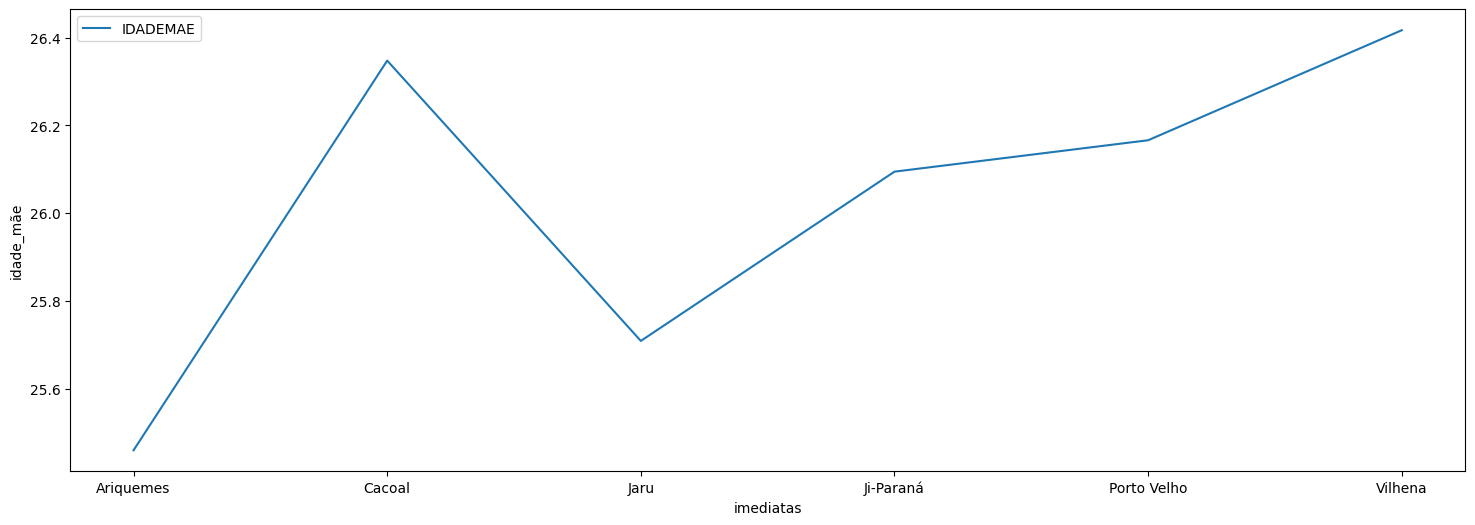

In [15]:
imediatas_idade_mae = sinasc_raw.set_index('munResNome').groupby(imediatas)['IDADEMAE'].mean().to_frame().plot(figsize=[18 ,6])
plt.ylabel('idade_mãe')
plt.xlabel('imediatas')
imediatas_idade_mae

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [16]:
IDH = {
    "Alta Floresta D'Oeste" : 'IDH-médio',
    'Alto Alegre dos Parecis': 'IDH-baixo',
    'Novo Horizonte do Oeste': 'IDH-médio',
    'Rolim de Moura': 'IDH-alto',
    "São Felipe D'Oeste": 'IDH-médio',
    'Ariquemes': 'IDH-alto',
    'Cujubim': 'IDH-médio',
    'Alto Paraíso': 'IDH-médio',
    'Monte Negro': 'IDH-médio',
    'Jaru': 'IDH-médio',
    'Rio Crespo': 'IDH-médio',
    'Porto Velho': 'IDH-alto',
    'Cacaulândia': 'IDH-médio',
    'Itapuã do Oeste': 'IDH-médio',
    'Ji-Paraná': 'IDH-alto',
    'Buritis': 'IDH-médio',
    'Vilhena':'IDH-alto',
    'Vale do Anari':'IDH-baixo',
    'Candeias do Jamari':'IDH-médio',
    'Costa Marques':'IDH-médio',
    'Campo Novo de Rondônia':'IDH-baixo',
    "Machadinho D'Oeste": 'IDH-baixo',
    'Colorado do Oeste': 'IDH-médio',
    'Nova Mamoré': 'IDH-baixo',
    'Urupá': 'IDH-médio',
    'Ouro Preto do Oeste': 'IDH-médio',
    'Corumbiara':'IDH-médio',
    'São Miguel do Guaporé':'IDH-médio',
    'Governador Jorge Teixeira': 'IDH-baixo',
    "Santa Luzia D'Oeste":'IDH-médio',
    'Pimenta Bueno': 'IDH-alto',
    'Mirante da Serra':'IDH-médio',
    'Cerejeiras':'IDH-médio',
    'Presidente Médici':'IDH-médio',
    'Cacoal': 'IDH-alto',
    'Parecis':'IDH-médio',
    "Espigão D'Oeste":'IDH-médio',
    'São Francisco do Guaporé':'IDH-médio',
    'Ministro Andreazza':'IDH-médio',
    "Nova Brasilândia D'Oeste":'IDH-médio',
    "Alvorada D'Oeste":'IDH-médio',
    'Primavera de Rondônia':'IDH-médio',
    'Seringueiras':'IDH-baixo',
    'Castanheiras':'IDH-médio',
    'Chupinguaia':'IDH-médio',
    'Guajará-Mirim':'IDH-médio',
    'Theobroma':'IDH-baixo',
    'Nova União':'IDH-baixo',
    'Teixeirópolis':'IDH-médio',
    'Vale do Paraíso':'IDH-médio',
    'Pimenteiras do Oeste':'IDH-médio',
    'Cabixi':'IDH-médio'
}

In [17]:
idh = sinasc_raw.set_index('munResNome')
idh.groupby(IDH)[['IDADEMAE', 'IDADEPAI']].agg(['mean','median', 'std'])

IDADEMAE                    IDADEPAI                 
                 mean median       std       mean median       std
munResNome                                                        
IDH-alto    26.280332   26.0  6.415374  31.074091   30.0  7.773149
IDH-baixo   25.326944   25.0  6.194908  30.617450   30.0  7.417345
IDH-médio   25.884855   25.0  6.353274  31.207092   30.0  7.824859

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [18]:
IFDM = {
    "Espigão d'Oeste":'des_regular',
    'Seringueiras':'des_regular',
    "Alvorada d'Oeste":'des_regular',
    'Itapuã do Oeste':'des_regular',
    'Cabixi':'des_regular',
    'Novo Horizonte do Oeste':'des_regular',
    "Nova Brasilândia d'Oeste":'des_regular',
    'Vale do Paraíso':'des_regular',
    'Corumbiara':'des_regular',
    'Alto Paraíso':'des_regular',
    'Cacaulândia':'des_regular',
    'Vale do Anari':'des_regular',
    'Ministro Andreazza':'des_regular',
    'Costa Marques':'des_regular',
    'Nova União':'des_regular',
    'Guajará-Mirim':'des_regular',
    'Mirante da Serra':'des_regular',
    'Parecis':'des_regular',
    'Castanheiras':'des_regular',
    'Theobroma':'des_regular',
    "Machadinho d'Oeste":'des_regular',
    'Campo Novo de Rondônia':'des_regular',
    'Nova Mamoré':'des_regular',
    'Cujubim':'des_regular',
    'Alto Alegre dos Parecis':'des_regular',
    'Governador Jorge Teixeira': 'des_regular',
    "Ariquemes": 'des_moderado',
    "Vilhena": 'des_moderado',
    "Pimenta Bueno": 'des_moderado',
    "Porto Velho": 'des_moderado',
    "Ji-Paraná": 'des_moderado',
    "Cacoal": 'des_moderado',
    "Santa Luzia d'Oeste": 'des_moderado',
    "Rolim de Moura": 'des_moderado',
    "Chupinguaia": 'des_moderado',
    "São Miguel do Guaporé": 'des_moderado',
    "Pimenteiras do Oeste": 'des_moderado',
    "Teixeirópolis": 'des_moderado',
    "Colorado do Oeste": 'des_moderado',
    "Jaru": 'des_moderado',
    "Rio Crespo": 'des_moderado',
    "Primavera de Rondônia": 'des_moderado',
    "Alta Floresta d'Oeste": 'des_moderado',
    "Ouro Preto do Oeste": 'des_moderado',
    "São Francisco do Guaporé": 'des_moderado',
    "Candeias do Jamari": 'des_moderado',
    "Buritis": 'des_moderado',
    "São Felipe d'Oeste": 'des_moderado',
    "Presidente Médici": 'des_moderado',
    "Cerejeiras": 'des_moderado',
    "Monte Negro": 'des_moderado',
    "Urupá": 'des_moderado',

}

In [19]:
sinasc_raw.set_index('munResNome')['IDADEMAE'].groupby(IFDM).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
des_moderado,561938,26.226921,12,53,26.0,6.388564,40.813756
des_regular,93135,25.412005,11,52,25.0,6.376854,40.664266


In [20]:
sinasc_raw.set_index('munResNome')['IDADEPAI'].groupby(IFDM).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
des_moderado,179957.0,31.145206,15.0,70.0,30.0,7.741017,59.923346
des_regular,25327.0,31.345297,16.0,73.0,30.0,7.975385,63.606768


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [21]:
PIB = {
    "Porto Velho": "Acima de 1 bilhão",
    "Ji-Paraná": "Acima de 1 bilhão",
    "Vilhena": "Acima de 1 bilhão",
    "Ariquemes": "Acima de 1 bilhão",
    "Cacoal": "Acima de 1 bilhão",
    "Jaru": "Acima de 1 bilhão",
    "Rolim de Moura": "Acima de 1 bilhão",
    "Pimenta Bueno": "Acima de 1 bilhão",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Buritis": "Acima de 500 Milhões",
    "Machadinho do Oeste": "Acima de 500 Milhões",
    "Espigão d'Oeste": "Acima de 500 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Alta Floresta do Oeste": "Acima de 300 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Nova Brasilândia do Oeste": "Acima de 300 Milhões",
    "Alto Paraíso": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Alvorada do Oeste": "Acima de 200 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Santa Luzia do Oeste": "Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Cabixi": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "São Felipe do Oeste": "Até 100 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Primavera de Rondônia": "Até 100 Milhões"
}


In [22]:
sinasc_raw.set_index('munResNome')['IDADEMAE'].groupby(PIB).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
Acima de 1 bilhão,465846,26.265562,12,47,26.0,6.403777,41.008357
Acima de 100 Milhões,47508,25.638424,12,52,25.0,6.324801,40.003102
Acima de 200 Milhões,13051,25.146435,13,41,25.0,5.905771,34.878129
Acima de 300 Milhões,32184,25.706070,11,47,25.0,6.344987,40.258860
Acima de 500 Milhões,86486,25.785927,13,53,25.0,6.479551,41.984580
Até 100 Milhões,9998,26.519894,14,41,26.0,5.877767,34.548140


In [23]:
sinasc_raw.set_index('munResNome')['IDADEPAI'].groupby(PIB).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
Acima de 1 bilhão,144654.0,31.108387,15.0,70.0,30.0,7.767477,60.333700
Acima de 100 Milhões,18253.0,31.744348,17.0,73.0,31.0,8.008643,64.138361
Acima de 200 Milhões,5796.0,30.187500,16.0,55.0,29.0,7.659388,58.666230
Acima de 300 Milhões,8691.0,30.819149,16.0,64.0,30.0,7.858123,61.750095
Acima de 500 Milhões,20869.0,31.381955,17.0,60.0,31.0,7.583172,57.504493
Até 100 Milhões,7021.0,31.626126,17.0,67.0,30.0,7.665510,58.760038


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

IDADEMAE:

A média de idade das mães parece ser semelhante entre as faixas (abaixo_-10.5 e acima_-10.5), com valores em torno de 26 anos.
A dispersão dos dados, representada pelo desvio padrão, também é relativamente baixa (~6 anos).
QTDFILVIVO:

Há uma diferença notável na soma e na média do número de filhos vivos (sum e mean) entre as faixas.
A faixa acima_-10.5 tem uma média ligeiramente menor de filhos vivos em comparação com a faixa abaixo_-10.5.
O desvio padrão (std) e a variância (var) são mais elevados na faixa acima_-10.5, indicando uma maior dispersão nos dados.

Pode haver uma associação entre a latitude (representada pelas faixas abaixo_-10.5 e acima_-10.5) e o número de filhos vivos, indicando possíveis diferenças demográficas ou socioeconômicas.